# 3. Lineare Regression am Beispiel von Healthcare Daten

## 3.1 Importiere Bibliotheken

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## 3.2 Einlesen der Daten

In [44]:
#data_url=r'https://github.com/tplusone/hanser_ml_zeitreihen/blob/master/Daten/insurance.csv?raw=true'
df = pd.read_csv('insurance.txt')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3.3 Einfaches univariates Modell charges(age)

In [45]:
# Daten festlegen, Modell festlegen, Modell fitten
X = df[['age']]
y = df['charges']
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [46]:
# Modellparameter anzeigen
anstieg = model.coef_
achsenabschnitt = model.intercept_
print(' y = '+str(anstieg)+'*x'+'+ '+str(achsenabschnitt))

 y = [257.72261867]*x+ 3165.8850060630284


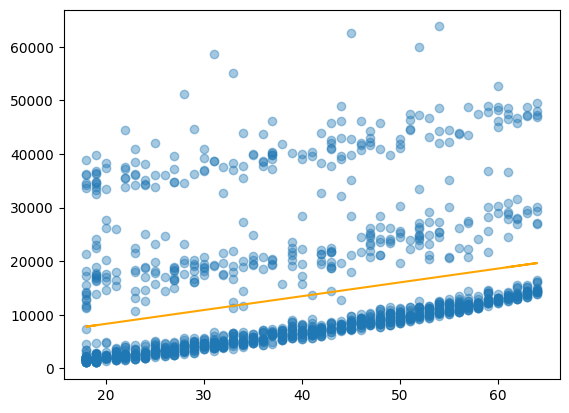

In [47]:
# Grafische Darstellung
import matplotlib.pyplot as plt

y_pred = model.predict(X)
plt.scatter( X,y, alpha=.4)
plt.plot(X, y_pred, c='orange')

In [48]:
# Genauigkeit des Modells berechnen
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
print('R2 = '+str(r2)+', mae = '+str(mae))

R2 = 0.08940589967885804, mae = 9055.14962050455


Anscheinend keine gute Modellierung! Hilft es vielleicht, wenn wir mehr Merkmale dazunehmen?

## 3.4 Multivariates Modell charge(age, bmi, children)

In [49]:
# Merkmale und Target definieren
df['sex'][df['sex']=='female']=1
df['sex'][df['sex']=='male']=0

X = df[['age','bmi','children','sex']]
y = df['charges']

C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_9132\3328949384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex']=='female']=1
C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_9132\3328949384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex']=='male']=0


In [50]:
# Modellbildung y = m1*x1 + m2*x2 + m3*x3 + n
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y,y_pred)
print('R2 = '+str(r2)+', mae = '+str(mae))

R2 = 0.12306876681889345, mae = 8982.350383484949


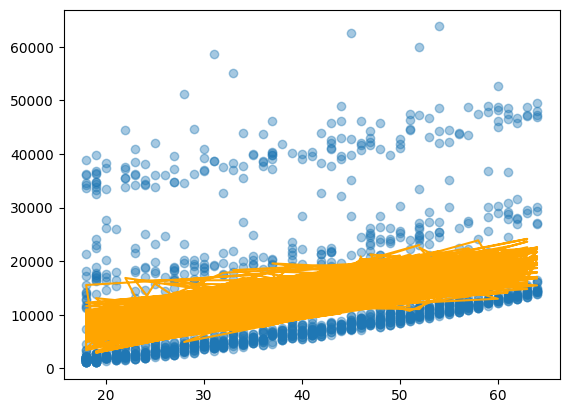

In [51]:
plt.scatter( X['age'],y, alpha=.4)
plt.plot(X['age'], y_pred, c='orange')

Die Regression ist an dieser Stelle nicht in der Lage, ein adäquates Modell der Daten zu bilden, da in den Daten selbst die drei Level nicht durch ausreichende Merkmale erklärt werden - zur Modellierung der Daten braucht es die Vorerkrankungen der Kunden, welche im Datensatz nicht enthalten sind.